<a href="https://colab.research.google.com/github/jmmiddour/DS-Unit-4-Sprint-2-Neural-Networks-1/blob/main/module2-Train/LS_DS_422_Train_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img align="left" src="https://lever-client-logos.s3.amazonaws.com/864372b1-534c-480e-acd5-9711f850815c-1524247202159.png" width=200>
<br></br>
<br></br>

# Train Practice

## *Data Science Unit 4 Sprint 2 Assignment 2*

Continue to use TensorFlow Keras & a sample of the [Quickdraw dataset](https://github.com/googlecreativelab/quickdraw-dataset) to build a sketch classification model. The dataset has been sampled to only 10 classes and 10000 observations per class. Please build a baseline classification model then run a few experiments with different optimizers and learning rates. 

*Don't forgot to switch to GPU on Colab!*

### Write a function to load your data

Wrap yesterday's preprocessing steps into a function that returns four items:
* X_train
* y_train
* X_test
* y_test

Your function should accept a `path` to the data as a argument.

In [1]:
# Imports 
import io
import requests
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split

# Tensorflow
import tensorflow as tf 
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam, Adamax, Ftrl, Nadam, RMSprop, SGD

# Plotting
import seaborn as sns
sns.set()
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
def load_quickdraw10(path):
  '''
  Function to load dataset
  '''
  response = requests.get(path)
  response.raise_for_status()
  data = np.load(io.BytesIO(response.content))

  X = data['arr_0']
  y = data['arr_1']

  X = X / 255

  # Split 20% test, stratified on y
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, 
                                                      stratify=y, 
                                                      random_state=42)

  return X_train, y_train, X_test, y_test

In [3]:
X_train, y_train, X_test, y_test = load_quickdraw10(
    'https://github.com/lukiepookieofficial/DS-Unit-4-Sprint-2-Neural-Networks/blob/main/quickdraw10.npz?raw=true')

# Look at the size of all my data now
print('X_train: ', X_train.shape)
print('y_train: ', y_train.shape)
print('X_test: ', X_test.shape)
print('y_test: ', y_test.shape)

X_train:  (80000, 784)
y_train:  (80000,)
X_test:  (20000, 784)
y_test:  (20000,)


### Write a Model Function
Using your model from yesterday, write a function called `create_model` which returns a compiled TensorFlow Keras Sequential Model suitable for classifying the QuickDraw-10 dataset. Include parameters for the following: 
* Learning Rate
* Optimizer

In [4]:
def create_model(act, lr, opt):
  '''
  Function to return a compiled TensorFlow Keras Sequential
    model for classifying the QuickDraw-10 dataset.

  Args:
    act : string : Activator for the hidden layers of the model
    lr  : int    : Learning rate for the optimizer
    opt : class  : Optimizer to run on the model
  '''
  # Instantiate the model
  model = Sequential([
                      Dense(128, activation=act, input_dim=784),
                      Dense(64, activation=act),
                      Dense(32, activation=act),
                      Dense(10, activation='softmax')
  ])

  model.compile(loss='sparse_categorical_crossentropy',
                optimizer=opt(learning_rate=lr),
                metrics=['accuracy'])
  
  return model

# Use function to create a default model
model = create_model('relu', 0.01, SGD)

# Look at the model summary
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 128)               100480    
_________________________________________________________________
dense_1 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_2 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_3 (Dense)              (None, 10)                330       
Total params: 111,146
Trainable params: 111,146
Non-trainable params: 0
_________________________________________________________________


### Experiment with Batch Size
* Run 5 experiments with various batch sizes of your choice. 
* Visualize the results
* Write up an analysis of the experiments and select the "best" performing model among your experiments. Make sure to compare against your model's performance yesterday. 

In [5]:
# Use function to create a default model
model = create_model('relu', 0.01, SGD)

# Batch size experiment #1
bs32 = model.fit(
  X_train, y_train,
  epochs=25,
  batch_size=32,
  validation_data=(X_test, y_test)
)

Epoch 1/25
2500/2500 [==============================] - 5s 2ms/step - loss: 1.0816 - accuracy: 0.6679 - val_loss: 0.7699 - val_accuracy: 0.7746
Epoch 2/25
2500/2500 [==============================] - 5s 2ms/step - loss: 0.7206 - accuracy: 0.7875 - val_loss: 0.6585 - val_accuracy: 0.8027
Epoch 3/25
2500/2500 [==============================] - 5s 2ms/step - loss: 0.6246 - accuracy: 0.8154 - val_loss: 0.5927 - val_accuracy: 0.8220
Epoch 4/25
2500/2500 [==============================] - 4s 2ms/step - loss: 0.5647 - accuracy: 0.8323 - val_loss: 0.5489 - val_accuracy: 0.8356
Epoch 5/25
2500/2500 [==============================] - 4s 2ms/step - loss: 0.5230 - accuracy: 0.8442 - val_loss: 0.5336 - val_accuracy: 0.8408
Epoch 6/25
2500/2500 [==============================] - 5s 2ms/step - loss: 0.4902 - accuracy: 0.8541 - val_loss: 0.5128 - val_accuracy: 0.8481
Epoch 7/25
2500/2500 [==============================] - 5s 2ms/step - loss: 0.4633 - accuracy: 0.8624 - val_loss: 0.5005 - val_accuracy:

In [6]:
# Use function to create a default model
model = create_model('relu', 0.01, SGD)

# Batch size experiment #2
bs256 = model.fit(
  X_train, y_train,
  epochs=25,
  batch_size=256,
  validation_data=(X_test, y_test)
)

Epoch 1/25
313/313 [==============================] - 2s 5ms/step - loss: 1.9503 - accuracy: 0.3776 - val_loss: 1.4715 - val_accuracy: 0.5483
Epoch 2/25
313/313 [==============================] - 2s 5ms/step - loss: 1.2510 - accuracy: 0.6144 - val_loss: 1.0939 - val_accuracy: 0.6596
Epoch 3/25
313/313 [==============================] - 2s 5ms/step - loss: 1.0291 - accuracy: 0.6922 - val_loss: 0.9514 - val_accuracy: 0.7139
Epoch 4/25
313/313 [==============================] - 2s 5ms/step - loss: 0.9229 - accuracy: 0.7300 - val_loss: 0.8766 - val_accuracy: 0.7439
Epoch 5/25
313/313 [==============================] - 2s 5ms/step - loss: 0.8647 - accuracy: 0.7480 - val_loss: 0.8340 - val_accuracy: 0.7579
Epoch 6/25
313/313 [==============================] - 2s 5ms/step - loss: 0.8266 - accuracy: 0.7591 - val_loss: 0.8014 - val_accuracy: 0.7655
Epoch 7/25
313/313 [==============================] - 2s 5ms/step - loss: 0.7969 - accuracy: 0.7678 - val_loss: 0.7785 - val_accuracy: 0.7749
Epoch 

In [7]:
# Use function to create a default model
model = create_model('relu', 0.01, SGD)

# Batch size experiment #3
bs512 = model.fit(
  X_train, y_train,
  epochs=25,
  batch_size=512,
  validation_data=(X_test, y_test)
)

Epoch 1/25
157/157 [==============================] - 1s 9ms/step - loss: 2.1700 - accuracy: 0.2230 - val_loss: 2.0155 - val_accuracy: 0.3243
Epoch 2/25
157/157 [==============================] - 1s 8ms/step - loss: 1.8371 - accuracy: 0.4039 - val_loss: 1.6246 - val_accuracy: 0.5128
Epoch 3/25
157/157 [==============================] - 1s 8ms/step - loss: 1.4499 - accuracy: 0.5695 - val_loss: 1.2838 - val_accuracy: 0.6123
Epoch 4/25
157/157 [==============================] - 1s 8ms/step - loss: 1.2074 - accuracy: 0.6366 - val_loss: 1.1172 - val_accuracy: 0.6596
Epoch 5/25
157/157 [==============================] - 1s 8ms/step - loss: 1.0851 - accuracy: 0.6742 - val_loss: 1.0258 - val_accuracy: 0.6884
Epoch 6/25
157/157 [==============================] - 1s 8ms/step - loss: 1.0104 - accuracy: 0.6995 - val_loss: 0.9677 - val_accuracy: 0.7064
Epoch 7/25
157/157 [==============================] - 1s 8ms/step - loss: 0.9589 - accuracy: 0.7162 - val_loss: 0.9213 - val_accuracy: 0.7232
Epoch 

In [8]:
# Use function to create a default model
model = create_model('relu', 0.01, SGD)

# Batch size experiment #4
bs64 = model.fit(
  X_train, y_train,
  epochs=25,
  batch_size=64,
  validation_data=(X_test, y_test)
)

Epoch 1/25
1250/1250 [==============================] - 3s 2ms/step - loss: 1.3161 - accuracy: 0.5857 - val_loss: 0.9192 - val_accuracy: 0.7254
Epoch 2/25
1250/1250 [==============================] - 3s 2ms/step - loss: 0.8539 - accuracy: 0.7502 - val_loss: 0.7819 - val_accuracy: 0.7703
Epoch 3/25
1250/1250 [==============================] - 3s 2ms/step - loss: 0.7585 - accuracy: 0.7793 - val_loss: 0.7213 - val_accuracy: 0.7883
Epoch 4/25
1250/1250 [==============================] - 3s 2ms/step - loss: 0.6988 - accuracy: 0.7958 - val_loss: 0.6677 - val_accuracy: 0.8046
Epoch 5/25
1250/1250 [==============================] - 3s 2ms/step - loss: 0.6511 - accuracy: 0.8096 - val_loss: 0.6358 - val_accuracy: 0.8122
Epoch 6/25
1250/1250 [==============================] - 3s 2ms/step - loss: 0.6119 - accuracy: 0.8205 - val_loss: 0.5937 - val_accuracy: 0.8260
Epoch 7/25
1250/1250 [==============================] - 3s 2ms/step - loss: 0.5780 - accuracy: 0.8303 - val_loss: 0.5730 - val_accuracy:

In [9]:
# Use function to create a default model
model = create_model('relu', 0.01, SGD)

# Batch size experiment #5
bs8 = model.fit(
  X_train, y_train,
  epochs=25,
  batch_size=8,
  validation_data=(X_test, y_test)
)

Epoch 1/25
10000/10000 [==============================] - 16s 2ms/step - loss: 0.8087 - accuracy: 0.7517 - val_loss: 0.5893 - val_accuracy: 0.8224
Epoch 2/25
10000/10000 [==============================] - 15s 1ms/step - loss: 0.5434 - accuracy: 0.8375 - val_loss: 0.5123 - val_accuracy: 0.8442
Epoch 3/25
10000/10000 [==============================] - 16s 2ms/step - loss: 0.4701 - accuracy: 0.8573 - val_loss: 0.4878 - val_accuracy: 0.8552
Epoch 4/25
10000/10000 [==============================] - 18s 2ms/step - loss: 0.4227 - accuracy: 0.8712 - val_loss: 0.4646 - val_accuracy: 0.8599
Epoch 5/25
10000/10000 [==============================] - 21s 2ms/step - loss: 0.3875 - accuracy: 0.8823 - val_loss: 0.4488 - val_accuracy: 0.8662
Epoch 6/25
10000/10000 [==============================] - 20s 2ms/step - loss: 0.3588 - accuracy: 0.8909 - val_loss: 0.4401 - val_accuracy: 0.8685
Epoch 7/25
10000/10000 [==============================] - 19s 2ms/step - loss: 0.3343 - accuracy: 0.8997 - val_loss: 0

In [10]:
# Use function to create a default model
model = create_model('relu', 0.01, SGD)

# Batch size experiment #6
bs128 = model.fit(
  X_train, y_train,
  epochs=25,
  batch_size=128,
  validation_data=(X_test, y_test)
)

Epoch 1/25
625/625 [==============================] - 3s 4ms/step - loss: 1.5867 - accuracy: 0.4883 - val_loss: 1.0808 - val_accuracy: 0.6777
Epoch 2/25
625/625 [==============================] - 2s 4ms/step - loss: 0.9657 - accuracy: 0.7146 - val_loss: 0.8734 - val_accuracy: 0.7389
Epoch 3/25
625/625 [==============================] - 3s 4ms/step - loss: 0.8484 - accuracy: 0.7502 - val_loss: 0.8057 - val_accuracy: 0.7591
Epoch 4/25
625/625 [==============================] - 2s 4ms/step - loss: 0.7935 - accuracy: 0.7657 - val_loss: 0.7658 - val_accuracy: 0.7729
Epoch 5/25
625/625 [==============================] - 2s 4ms/step - loss: 0.7535 - accuracy: 0.7776 - val_loss: 0.7315 - val_accuracy: 0.7839
Epoch 6/25
625/625 [==============================] - 2s 4ms/step - loss: 0.7209 - accuracy: 0.7883 - val_loss: 0.7128 - val_accuracy: 0.7873
Epoch 7/25
625/625 [==============================] - 2s 4ms/step - loss: 0.6923 - accuracy: 0.7969 - val_loss: 0.6780 - val_accuracy: 0.7994
Epoch 

In [11]:
batch_sizes = []

for exp, result in zip([bs8, bs32, bs64, bs128, bs256, bs512], 
                       ["8_", "32_", "64_", "128_", "256_", "512_"]):
    df = pd.DataFrame.from_dict(exp.history)
    df['epoch'] = df.index.values
    df['Batch Size'] = result
    batch_sizes.append(df)

df = pd.concat(batch_sizes)
df['Batch Size'] = df['Batch Size'].astype('str')
df.head()

,loss,accuracy,val_loss,val_accuracy,epoch,Batch Size
0,0.808702,0.751675,0.589292,0.82245,0,8_
1,0.543390,0.837500,0.512314,0.84420,1,8_
2,0.470080,0.857313,0.487800,0.85520,2,8_
3,0.422669,0.871225,0.464552,0.85990,3,8_
4,0.387503,0.882338,0.448755,0.86620,4,8_


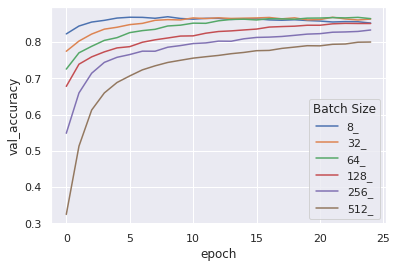

In [12]:
sns.lineplot(x='epoch', y='val_accuracy', hue='Batch Size', data=df);

/usr/local/lib/python3.6/dist-packages/seaborn/relational.py:507: MatplotlibDeprecationWarning: Saw kwargs ['c', 'color'] which are all aliases for 'color'.  Kept value from 'color'.  Passing multiple aliases for the same property will raise a TypeError in 3.3.
  line, = ax.plot([], [], **kws)
/usr/local/lib/python3.6/dist-packages/seaborn/relational.py:522: MatplotlibDeprecationWarning: Saw kwargs ['c', 'color'] which are all aliases for 'color'.  Kept value from 'color'.  Passing multiple aliases for the same property will raise a TypeError in 3.3.
  line, = ax.plot(x, y, **kws)
/usr/local/lib/python3.6/dist-packages/seaborn/relational.py:507: MatplotlibDeprecationWarning: Saw kwargs ['c', 'color'] which are all aliases for 'color'.  Kept value from 'color'.  Passing multiple aliases for the same property will raise a TypeError in 3.3.
  line, = ax.plot([], [], **kws)
/usr/local/lib/python3.6/dist-packages/seaborn/relational.py:522: MatplotlibDeprecationWarning: Saw kwargs ['c', 'col

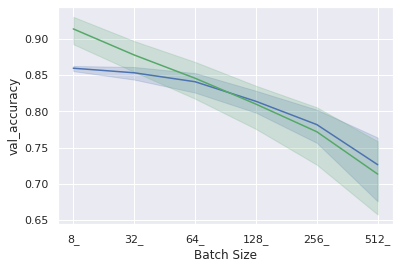

In [13]:
sns.lineplot(x='Batch Size', y='val_accuracy', data=df, c='b')
sns.lineplot(x='Batch Size', y='accuracy', data=df, c='g');

### Experiment with Learning Rate
* Run 5 experiments with various learning rate magnitudes: 1, .1, .01, .001, .0001.
* Use the "best" batch size from the previous experiment
* Visualize the results
* Write up an analysis of the experiments and select the "best" performing model among your experiments. Make sure to compare against the previous experiments and your model's performance yesterday. 

In [14]:
# Use function to create a default model
model = create_model('relu', 0.1, SGD)

# Learning Rate experiment #1
bs64_1 = model.fit(
  X_train, y_train,
  epochs=20,
  batch_size=64,
  validation_data=(X_test, y_test)
)

Epoch 1/20
1250/1250 [==============================] - 4s 3ms/step - loss: 0.7801 - accuracy: 0.7575 - val_loss: 0.5615 - val_accuracy: 0.8316
Epoch 2/20
1250/1250 [==============================] - 4s 3ms/step - loss: 0.5320 - accuracy: 0.8380 - val_loss: 0.4938 - val_accuracy: 0.8498
Epoch 3/20
1250/1250 [==============================] - 3s 3ms/step - loss: 0.4620 - accuracy: 0.8595 - val_loss: 0.4614 - val_accuracy: 0.8611
Epoch 4/20
1250/1250 [==============================] - 3s 3ms/step - loss: 0.4147 - accuracy: 0.8730 - val_loss: 0.4503 - val_accuracy: 0.8635
Epoch 5/20
1250/1250 [==============================] - 3s 3ms/step - loss: 0.3812 - accuracy: 0.8827 - val_loss: 0.4388 - val_accuracy: 0.8688
Epoch 6/20
1250/1250 [==============================] - 3s 3ms/step - loss: 0.3545 - accuracy: 0.8909 - val_loss: 0.4388 - val_accuracy: 0.8694
Epoch 7/20
1250/1250 [==============================] - 3s 3ms/step - loss: 0.3291 - accuracy: 0.8995 - val_loss: 0.4637 - val_accuracy:

In [15]:
# Use function to create a default model
model = create_model('relu', 0.25, SGD)

# Learning Rate experiment #2
bs64_25 = model.fit(
  X_train, y_train,
  epochs=20,
  batch_size=64,
  validation_data=(X_test, y_test)
)

Epoch 1/20
1250/1250 [==============================] - 3s 3ms/step - loss: 0.7152 - accuracy: 0.7767 - val_loss: 0.5182 - val_accuracy: 0.8418
Epoch 2/20
1250/1250 [==============================] - 3s 3ms/step - loss: 0.4954 - accuracy: 0.8480 - val_loss: 0.4926 - val_accuracy: 0.8495
Epoch 3/20
1250/1250 [==============================] - 3s 3ms/step - loss: 0.4323 - accuracy: 0.8666 - val_loss: 0.4779 - val_accuracy: 0.8571
Epoch 4/20
1250/1250 [==============================] - 3s 2ms/step - loss: 0.3904 - accuracy: 0.8789 - val_loss: 0.4678 - val_accuracy: 0.8590
Epoch 5/20
1250/1250 [==============================] - 3s 3ms/step - loss: 0.3593 - accuracy: 0.8882 - val_loss: 0.4407 - val_accuracy: 0.8677
Epoch 6/20
1250/1250 [==============================] - 3s 3ms/step - loss: 0.3345 - accuracy: 0.8968 - val_loss: 0.4428 - val_accuracy: 0.8687
Epoch 7/20
1250/1250 [==============================] - 3s 3ms/step - loss: 0.3152 - accuracy: 0.9016 - val_loss: 0.4584 - val_accuracy:

In [16]:
# Use function to create a default model
model = create_model('relu', 0.3, SGD)

# Learning Rate experiment #3
bs64_3 = model.fit(
  X_train, y_train,
  epochs=20,
  batch_size=64,
  validation_data=(X_test, y_test)
)

Epoch 1/20
1250/1250 [==============================] - 3s 3ms/step - loss: 0.7290 - accuracy: 0.7696 - val_loss: 0.5243 - val_accuracy: 0.8390
Epoch 2/20
1250/1250 [==============================] - 3s 3ms/step - loss: 0.4952 - accuracy: 0.8475 - val_loss: 0.4970 - val_accuracy: 0.8467
Epoch 3/20
1250/1250 [==============================] - 3s 2ms/step - loss: 0.4314 - accuracy: 0.8661 - val_loss: 0.4835 - val_accuracy: 0.8504
Epoch 4/20
1250/1250 [==============================] - 3s 3ms/step - loss: 0.3898 - accuracy: 0.8791 - val_loss: 0.4526 - val_accuracy: 0.8635
Epoch 5/20
1250/1250 [==============================] - 3s 3ms/step - loss: 0.3624 - accuracy: 0.8870 - val_loss: 0.4426 - val_accuracy: 0.8662
Epoch 6/20
1250/1250 [==============================] - 3s 3ms/step - loss: 0.3356 - accuracy: 0.8959 - val_loss: 0.4450 - val_accuracy: 0.8689
Epoch 7/20
1250/1250 [==============================] - 3s 3ms/step - loss: 0.3162 - accuracy: 0.9008 - val_loss: 0.4432 - val_accuracy:

In [17]:
# Use function to create a default model
model = create_model('relu', 0.001, SGD)

# Learning Rate experiment #4
bs64_001 = model.fit(
  X_train, y_train,
  epochs=20,
  batch_size=64,
  validation_data=(X_test, y_test)
)

Epoch 1/20
1250/1250 [==============================] - 3s 3ms/step - loss: 2.2344 - accuracy: 0.1467 - val_loss: 2.1226 - val_accuracy: 0.2066
Epoch 2/20
1250/1250 [==============================] - 3s 3ms/step - loss: 1.9682 - accuracy: 0.3298 - val_loss: 1.7820 - val_accuracy: 0.4338
Epoch 3/20
1250/1250 [==============================] - 3s 3ms/step - loss: 1.6068 - accuracy: 0.4873 - val_loss: 1.4464 - val_accuracy: 0.5361
Epoch 4/20
1250/1250 [==============================] - 3s 3ms/step - loss: 1.3577 - accuracy: 0.5676 - val_loss: 1.2654 - val_accuracy: 0.6030
Epoch 5/20
1250/1250 [==============================] - 3s 3ms/step - loss: 1.2175 - accuracy: 0.6224 - val_loss: 1.1498 - val_accuracy: 0.6483
Epoch 6/20
1250/1250 [==============================] - 3s 3ms/step - loss: 1.1189 - accuracy: 0.6606 - val_loss: 1.0631 - val_accuracy: 0.6790
Epoch 7/20
1250/1250 [==============================] - 3s 3ms/step - loss: 1.0435 - accuracy: 0.6891 - val_loss: 0.9971 - val_accuracy:

In [18]:
# Use function to create a default model
model = create_model('relu', 0.5, SGD)

# Learning Rate experiment #5
bs64_5 = model.fit(
  X_train, y_train,
  epochs=20,
  batch_size=64,
  validation_data=(X_test, y_test)
)

Epoch 1/20
1250/1250 [==============================] - 3s 3ms/step - loss: 0.7289 - accuracy: 0.7700 - val_loss: 0.5217 - val_accuracy: 0.8388
Epoch 2/20
1250/1250 [==============================] - 3s 3ms/step - loss: 0.5131 - accuracy: 0.8412 - val_loss: 0.4786 - val_accuracy: 0.8532
Epoch 3/20
1250/1250 [==============================] - 3s 3ms/step - loss: 0.4508 - accuracy: 0.8620 - val_loss: 0.5057 - val_accuracy: 0.8478
Epoch 4/20
1250/1250 [==============================] - 3s 3ms/step - loss: 0.4150 - accuracy: 0.8730 - val_loss: 0.4783 - val_accuracy: 0.8571
Epoch 5/20
1250/1250 [==============================] - 3s 3ms/step - loss: 0.3874 - accuracy: 0.8811 - val_loss: 0.4616 - val_accuracy: 0.8622
Epoch 6/20
1250/1250 [==============================] - 4s 3ms/step - loss: 0.3658 - accuracy: 0.8881 - val_loss: 0.4735 - val_accuracy: 0.8615
Epoch 7/20
1250/1250 [==============================] - 3s 3ms/step - loss: 0.3471 - accuracy: 0.8938 - val_loss: 0.4913 - val_accuracy:

In [19]:
# Use function to create a default model
model = create_model('relu', 0.75, SGD)

# Learning Rate experiment #6
bs64_75 = model.fit(
  X_train, y_train,
  epochs=20,
  batch_size=64,
  validation_data=(X_test, y_test)
)

Epoch 1/20
1250/1250 [==============================] - 3s 3ms/step - loss: 0.8112 - accuracy: 0.7398 - val_loss: 0.6103 - val_accuracy: 0.8065
Epoch 2/20
1250/1250 [==============================] - 3s 3ms/step - loss: 0.5515 - accuracy: 0.8325 - val_loss: 0.5464 - val_accuracy: 0.8349
Epoch 3/20
1250/1250 [==============================] - 3s 3ms/step - loss: 0.4926 - accuracy: 0.8513 - val_loss: 0.5184 - val_accuracy: 0.8476
Epoch 4/20
1250/1250 [==============================] - 3s 3ms/step - loss: 0.4544 - accuracy: 0.8629 - val_loss: 0.5436 - val_accuracy: 0.8451
Epoch 5/20
1250/1250 [==============================] - 3s 3ms/step - loss: 0.4321 - accuracy: 0.8704 - val_loss: 0.5254 - val_accuracy: 0.8472
Epoch 6/20
1250/1250 [==============================] - 3s 3ms/step - loss: 0.4107 - accuracy: 0.8768 - val_loss: 0.5014 - val_accuracy: 0.8543
Epoch 7/20
1250/1250 [==============================] - 3s 3ms/step - loss: 0.3910 - accuracy: 0.8821 - val_loss: 0.5157 - val_accuracy:

In [20]:
learning_rate = []

for exp, result in zip([bs64_001, bs64_1, bs64_25, bs64_3, bs64_5, bs64_75], 
                       [".001", ".1", ".25", ".3", ".5", ".75"]):
    df = pd.DataFrame.from_dict(exp.history)
    df['epoch'] = df.index.values
    df['Learning Rate'] = result
    learning_rate.append(df)

df = pd.concat(learning_rate)
df['Learning Rate'] = df['Learning Rate'].astype('str')
df.head()

,loss,accuracy,val_loss,val_accuracy,epoch,Learning Rate
0,2.234389,0.146675,2.122633,0.20660,0,.001
1,1.968167,0.329762,1.781990,0.43385,1,.001
2,1.606828,0.487275,1.446390,0.53615,2,.001
3,1.357705,0.567600,1.265361,0.60305,3,.001
4,1.217546,0.622362,1.149849,0.64830,4,.001


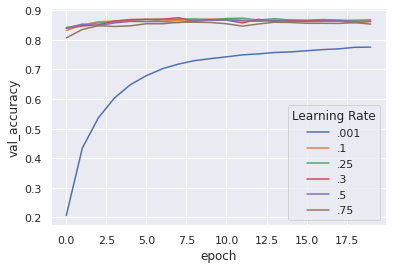

In [21]:
sns.lineplot(x='epoch', y='val_accuracy', hue='Learning Rate', data=df);

/usr/local/lib/python3.6/dist-packages/seaborn/relational.py:507: MatplotlibDeprecationWarning: Saw kwargs ['c', 'color'] which are all aliases for 'color'.  Kept value from 'color'.  Passing multiple aliases for the same property will raise a TypeError in 3.3.
  line, = ax.plot([], [], **kws)
/usr/local/lib/python3.6/dist-packages/seaborn/relational.py:522: MatplotlibDeprecationWarning: Saw kwargs ['c', 'color'] which are all aliases for 'color'.  Kept value from 'color'.  Passing multiple aliases for the same property will raise a TypeError in 3.3.
  line, = ax.plot(x, y, **kws)
/usr/local/lib/python3.6/dist-packages/seaborn/relational.py:507: MatplotlibDeprecationWarning: Saw kwargs ['c', 'color'] which are all aliases for 'color'.  Kept value from 'color'.  Passing multiple aliases for the same property will raise a TypeError in 3.3.
  line, = ax.plot([], [], **kws)
/usr/local/lib/python3.6/dist-packages/seaborn/relational.py:522: MatplotlibDeprecationWarning: Saw kwargs ['c', 'col

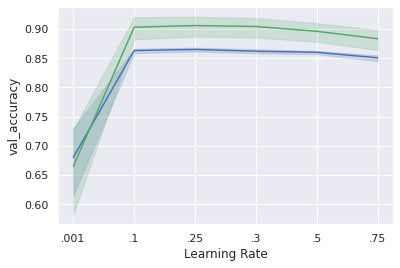

In [22]:
sns.lineplot(x='Learning Rate', y='val_accuracy', data=df, c='b')
sns.lineplot(x='Learning Rate', y='accuracy', data=df, c='g');

### Experiment with different Optimizers
* Run 5 experiments with various optimizers available in TensorFlow. See list [here](https://www.tensorflow.org/api_docs/python/tf/keras/optimizers)
* Visualize the results
* Write up an analysis of the experiments and select the "best" performing model among your experiments. Make sure to compare against the previous experiments and your model's performance yesterday.
* Repeat the experiment combining Learning Rate and different optimizers. Does the best performing model change? 

In [27]:
# Use function to create a default model
model = create_model('relu', 0.01, Adam)

# Optimizer experiment #1
bs64_Adam = model.fit(
  X_train, y_train,
  epochs=20,
  batch_size=64,
  validation_data=(X_test, y_test)
)

Epoch 1/20
1250/1250 [==============================] - 4s 3ms/step - loss: 0.6916 - accuracy: 0.7896 - val_loss: 0.5777 - val_accuracy: 0.8286
Epoch 2/20
1250/1250 [==============================] - 4s 3ms/step - loss: 0.5487 - accuracy: 0.8349 - val_loss: 0.5475 - val_accuracy: 0.8386
Epoch 3/20
1250/1250 [==============================] - 4s 3ms/step - loss: 0.5096 - accuracy: 0.8490 - val_loss: 0.5524 - val_accuracy: 0.8379
Epoch 4/20
1250/1250 [==============================] - 4s 3ms/step - loss: 0.4806 - accuracy: 0.8580 - val_loss: 0.5090 - val_accuracy: 0.8528
Epoch 5/20
1250/1250 [==============================] - 4s 3ms/step - loss: 0.4627 - accuracy: 0.8648 - val_loss: 0.5280 - val_accuracy: 0.8536
Epoch 6/20
1250/1250 [==============================] - 4s 3ms/step - loss: 0.4431 - accuracy: 0.8713 - val_loss: 0.5233 - val_accuracy: 0.8551
Epoch 7/20
1250/1250 [==============================] - 4s 3ms/step - loss: 0.4303 - accuracy: 0.8737 - val_loss: 0.5539 - val_accuracy:

In [28]:
# Use function to create a default model
model = create_model('relu', 0.01, Adamax)

# Optimizer experiment #2
bs64_Adamax = model.fit(
  X_train, y_train,
  epochs=20,
  batch_size=64,
  validation_data=(X_test, y_test)
)

Epoch 1/20
1250/1250 [==============================] - 4s 3ms/step - loss: 0.6481 - accuracy: 0.8010 - val_loss: 0.5092 - val_accuracy: 0.8458
Epoch 2/20
1250/1250 [==============================] - 4s 3ms/step - loss: 0.4783 - accuracy: 0.8537 - val_loss: 0.4863 - val_accuracy: 0.8526
Epoch 3/20
1250/1250 [==============================] - 4s 3ms/step - loss: 0.4190 - accuracy: 0.8717 - val_loss: 0.4609 - val_accuracy: 0.8624
Epoch 4/20
1250/1250 [==============================] - 4s 3ms/step - loss: 0.3782 - accuracy: 0.8849 - val_loss: 0.4396 - val_accuracy: 0.8691
Epoch 5/20
1250/1250 [==============================] - 4s 3ms/step - loss: 0.3468 - accuracy: 0.8940 - val_loss: 0.4506 - val_accuracy: 0.8678
Epoch 6/20
1250/1250 [==============================] - 4s 3ms/step - loss: 0.3225 - accuracy: 0.9009 - val_loss: 0.4495 - val_accuracy: 0.8705
Epoch 7/20
1250/1250 [==============================] - 4s 3ms/step - loss: 0.3007 - accuracy: 0.9065 - val_loss: 0.4790 - val_accuracy:

In [29]:
# Use function to create a default model
model = create_model('relu', 0.01, Ftrl)

# Optimizer experiment #3
bs64_Ftrl = model.fit(
  X_train, y_train,
  epochs=20,
  batch_size=64,
  validation_data=(X_test, y_test)
)

Epoch 1/20
1250/1250 [==============================] - 5s 4ms/step - loss: 2.3027 - accuracy: 0.0965 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 2/20
1250/1250 [==============================] - 5s 4ms/step - loss: 2.3026 - accuracy: 0.0969 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 3/20
1250/1250 [==============================] - 4s 4ms/step - loss: 2.3026 - accuracy: 0.0970 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 4/20
1250/1250 [==============================] - 4s 3ms/step - loss: 2.3026 - accuracy: 0.0978 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 5/20
1250/1250 [==============================] - 4s 3ms/step - loss: 2.3026 - accuracy: 0.0980 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 6/20
1250/1250 [==============================] - 4s 4ms/step - loss: 2.3026 - accuracy: 0.0991 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 7/20
1250/1250 [==============================] - 4s 3ms/step - loss: 2.3026 - accuracy: 0.0960 - val_loss: 2.3026 - val_accuracy:

In [30]:
# Use function to create a default model
model = create_model('relu', 0.01, Nadam)

# Optimizer experiment #4
bs64_Nadam = model.fit(
  X_train, y_train,
  epochs=20,
  batch_size=64,
  validation_data=(X_test, y_test)
)

Epoch 1/20
1250/1250 [==============================] - 6s 5ms/step - loss: 0.6932 - accuracy: 0.7876 - val_loss: 0.5921 - val_accuracy: 0.8251
Epoch 2/20
1250/1250 [==============================] - 6s 5ms/step - loss: 0.5405 - accuracy: 0.8384 - val_loss: 0.5589 - val_accuracy: 0.8344
Epoch 3/20
1250/1250 [==============================] - 6s 4ms/step - loss: 0.5019 - accuracy: 0.8513 - val_loss: 0.5382 - val_accuracy: 0.8435
Epoch 4/20
1250/1250 [==============================] - 6s 5ms/step - loss: 0.4806 - accuracy: 0.8569 - val_loss: 0.5518 - val_accuracy: 0.8429
Epoch 5/20
1250/1250 [==============================] - 6s 5ms/step - loss: 0.4603 - accuracy: 0.8648 - val_loss: 0.5349 - val_accuracy: 0.8493
Epoch 6/20
1250/1250 [==============================] - 6s 5ms/step - loss: 0.4462 - accuracy: 0.8699 - val_loss: 0.5464 - val_accuracy: 0.8490
Epoch 7/20
1250/1250 [==============================] - 6s 5ms/step - loss: 0.4303 - accuracy: 0.8741 - val_loss: 0.5135 - val_accuracy:

In [31]:
# Use function to create a default model
model = create_model('relu', 0.01, RMSprop)

# Optimizer experiment #5
bs64_RMSprop = model.fit(
  X_train, y_train,
  epochs=20,
  batch_size=64,
  validation_data=(X_test, y_test)
)

Epoch 1/20
1250/1250 [==============================] - 5s 4ms/step - loss: 0.7830 - accuracy: 0.7655 - val_loss: 0.6713 - val_accuracy: 0.8026
Epoch 2/20
1250/1250 [==============================] - 4s 4ms/step - loss: 0.6530 - accuracy: 0.8152 - val_loss: 0.6331 - val_accuracy: 0.8200
Epoch 3/20
1250/1250 [==============================] - 5s 4ms/step - loss: 0.6397 - accuracy: 0.8241 - val_loss: 0.7613 - val_accuracy: 0.8213
Epoch 4/20
1250/1250 [==============================] - 4s 4ms/step - loss: 0.6328 - accuracy: 0.8281 - val_loss: 0.9388 - val_accuracy: 0.8144
Epoch 5/20
1250/1250 [==============================] - 4s 4ms/step - loss: 0.6691 - accuracy: 0.8230 - val_loss: 0.7349 - val_accuracy: 0.8284
Epoch 6/20
1250/1250 [==============================] - 5s 4ms/step - loss: 0.6785 - accuracy: 0.8285 - val_loss: 0.7345 - val_accuracy: 0.8317
Epoch 7/20
1250/1250 [==============================] - 4s 4ms/step - loss: 0.6931 - accuracy: 0.8286 - val_loss: 0.7478 - val_accuracy:

In [32]:
optimize = []

for exp, result in zip([bs64_Adam, bs64_Adamax, bs64_Ftrl, bs64_Nadam, 
                        bs64_RMSprop], ['Adam', 'Adamax', 'Ftrl', 'Nadam', 
                                        'RMSprop']):
    df = pd.DataFrame.from_dict(exp.history)
    df['epoch'] = df.index.values
    df['Optimizer'] = result
    optimize.append(df)

df = pd.concat(optimize)
df['Optimizer'] = df['Optimizer'].astype('str')
df.head()

,loss,accuracy,val_loss,val_accuracy,epoch,Optimizer
0,0.691574,0.789563,0.577673,0.82865,0,Adam
1,0.548662,0.834888,0.547457,0.83860,1,Adam
2,0.509606,0.849050,0.552406,0.83790,2,Adam
3,0.480626,0.857962,0.508966,0.85280,3,Adam
4,0.462712,0.864788,0.527979,0.85365,4,Adam


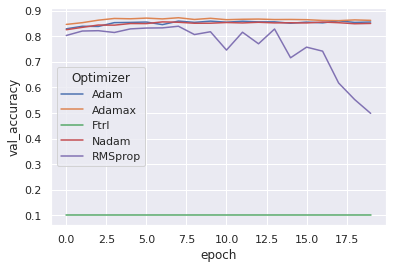

In [33]:
sns.lineplot(x='epoch', y='val_accuracy', hue='Optimizer', data=df);

/usr/local/lib/python3.6/dist-packages/seaborn/relational.py:507: MatplotlibDeprecationWarning: Saw kwargs ['c', 'color'] which are all aliases for 'color'.  Kept value from 'color'.  Passing multiple aliases for the same property will raise a TypeError in 3.3.
  line, = ax.plot([], [], **kws)
/usr/local/lib/python3.6/dist-packages/seaborn/relational.py:522: MatplotlibDeprecationWarning: Saw kwargs ['c', 'color'] which are all aliases for 'color'.  Kept value from 'color'.  Passing multiple aliases for the same property will raise a TypeError in 3.3.
  line, = ax.plot(x, y, **kws)
/usr/local/lib/python3.6/dist-packages/seaborn/relational.py:507: MatplotlibDeprecationWarning: Saw kwargs ['c', 'color'] which are all aliases for 'color'.  Kept value from 'color'.  Passing multiple aliases for the same property will raise a TypeError in 3.3.
  line, = ax.plot([], [], **kws)
/usr/local/lib/python3.6/dist-packages/seaborn/relational.py:522: MatplotlibDeprecationWarning: Saw kwargs ['c', 'col

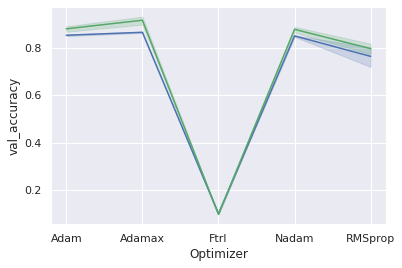

In [34]:
sns.lineplot(x='Optimizer', y='val_accuracy', data=df, c='b')
sns.lineplot(x='Optimizer', y='accuracy', data=df, c='g');

### Additional Written Tasks

1. Describe the process of backpropagation in your own words: 
    
  ```An algorithm used when training a feedforward neural network using gradient descent. This method calculates the gradient of an error function using the neural network's weights.```





## Stretch Goals: 

- Implement GridSearch on anyone of the experiments
- On the learning rate experiments, implement [EarlyStopping](https://www.tensorflow.org/api_docs/python/tf/keras/callbacks/EarlyStopping)
- Review material on the math behind gradient descent: 

  - Gradient Descent
    - Gradient Descent, Step-by-Step  by StatQuest w/ Josh Starmer. This will help you understand the gradient descent based optimization that happens underneath the hood of neural networks. It uses a non-neural network example, which I believe is a gentler introduction. You will hear me refer to this technique as "vanilla" gradient descent. 
    - Stochastic Gradient Descent, Clearly Explained!!! by StatQuest w/ Josh Starmer. This builds on the techniques in the previous video.  This technique is the one that is actually implemented inside modern 'nets. 
These are great resources to help you understand tomorrow's material at a deeper level. I highly recommend watching these ahead of tomorrow.

  - Background Math
    - Dot products and duality by 3Blue1Brown. Explains the core linear algebra operation happening in today's perceptron.
The paradox of the derivative by 3Blue1Brown. Does a great job explaining a derivative. 
    - Visualizing the chain rule and product rule by 3Blue1Brown. Explains the black magic that happens within Stochastic Gradient Descent. 
These math resources are very much optional. They can be very heady, but I encourage you to explore. Your understanding of neural networks will greatly increase if you understand this math background.


